Notebook to create the scatter plots that display the individual predictions of a framework per word pair.

In [1]:
data_file_location = "../data/output/scatter_plot.csv"

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import nltk
from nltk.corpus import wordnet as wn

from operations.composition import *
from operations.similarity_measures import *
from operations.logical_negation import *
from operations.worldly_context_creation import *
from operations.helpers import *

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pickle
import csv
import random
import math
import copy

import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D 


from matplotlib.lines import Line2D 
from matplotlib.ticker import MaxNLocator

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/benjaminrodatz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
file = []
df = None

with open(data_file_location, newline='') as csvfile:
        # with open('df_i4_all_idneg.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            test = row
            file.append(row)

        df = pd.DataFrame(file[1:])
        df.columns = file[0]


In [4]:
# convert the rows after row 5 to numeric.
# It is assumed that these only contain numbers which can then be compared to the human rating.
# This cell prints all rows which have been found and will eventually be compared to the human rating.

df["MEANRATING"] = pd.to_numeric(df["MEANRATING"])
for col in df.columns[5:]:
    print(col)
    df[col] = pd.to_numeric(df[col])
    


4_logical_negation_trace
4_negated_trace
4_negated_scaled_trace


0 0 0
Line2D(_line0)
0.02185709816806346
1 0 1
Line2D(_line0)
0.24532062771317414


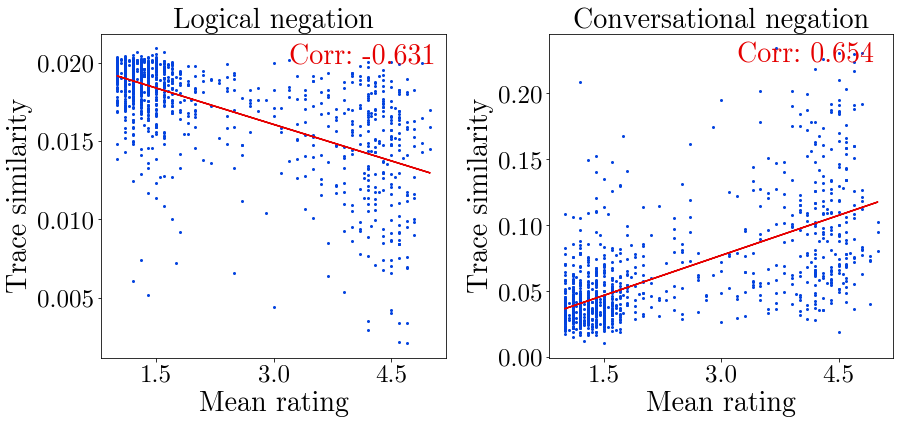

In [5]:


from matplotlib.lines import Line2D 
from matplotlib.ticker import MaxNLocator
from matplotlib import font_manager
from matplotlib import font_manager

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

fontsize = 32


path = '/usr/share/fonts/truetype/newfonts/cmunrm.ttf'
prop = font_manager.FontProperties(fname=path, size=28)
prop_smaller = font_manager.FontProperties(fname=path, size=25)


data = ['4_logical_negation_trace', '4_negated_trace']
for i in range(len(data)):
    value2 = data[i]
    print(i, int(i/2), i%2)

    axis = ax[i]
    
    ary = df[value2].values
    arx = df['MEANRATING'].values[np.logical_not(np.isnan(ary))]
    ary = ary[np.logical_not(np.isnan(ary))]
    arx = np.asarray(arx, dtype=np.float64, order='C')

    ary = df[value2].values
    arx = df['MEANRATING'].values

    z = np.polyfit(x=arx[np.logical_not(np.isnan(ary))], y=ary[np.logical_not(np.isnan(ary))], deg=1)
    p = np.poly1d(z)
    trendline = p(arx)

#     trend = regression.predict(beta=regression.beta, x=x[20:]) # slicing to only use last 30 points
#     data = pd.DataFrame(index=arx, data={'y': ary, 'trend': trendline})
    
#     plt.plot(ax=axis)

#     plt.scatter(ax = axis, x=arx, y=ary, s=7)
    df.plot.scatter(ax = axis, x="MEANRATING", y=value2, legend=False, s = 4, color="xkcd:blue")

    line = Line2D(arx, trendline, color="xkcd:red")
    axis.add_line(line)
    axis.set_ylabel("Trace similarity", fontproperties=prop)
    axis.set_xlabel("Mean rating", fontproperties=prop)

    print(line)  
    print(axis.get_ylim()[1])
    axis.text(3.2, axis.get_ylim()[1] * 0.91, ('Corr: ' + str(round(df.corrwith(df[value2], method="pearson")["MEANRATING"], 3))), fontproperties=prop,  color='xkcd:red')
    axis.tick_params(axis='x', labelsize=fontsize)
    axis.tick_params(axis='y', labelsize=fontsize)
    axis.yaxis.set_major_locator(MaxNLocator(5)) 
    axis.xaxis.set_major_locator(MaxNLocator(3)) 
    
    for label in axis.get_yticklabels():
        label.set_fontproperties(prop_smaller)

    for label in axis.get_xticklabels():
        label.set_fontproperties(prop_smaller)
    
ax[0].set_title("Logical negation", fontproperties=prop)
ax[1].set_title("Conversational negation", fontproperties=prop)


    
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.4)



plt.savefig("Correlation", bbox_inches='tight')

